<a href="https://colab.research.google.com/github/HamdiJ/Data-Science/blob/master/Use_case_CAC40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
#df_week = pd.read_csv("/content/drive/MyDrive/datasets/cac40.csv",sep = ',',header = 0, encoding = 'ISO-8859-1')
#df_month = pd.read_csv("/content/drive/MyDrive/datasets/nasadaq_month.csv",sep = ',',header = 0, encoding = 'ISO-8859-1')
df = pd.read_csv("/content/drive/MyDrive/datasets/cac40.csv",sep = ',',header = 0, encoding = 'ISO-8859-1')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df['Date'] = pd.to_datetime(df['Date'])



In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-01-02,1755.300049,1765.500000,1746.599976,1749.900024,1749.900024,0.0
1,1992-01-03,1760.500000,1771.000000,1749.099976,1770.300049,1770.300049,0.0
2,1992-01-06,1794.000000,1802.500000,1782.699951,1787.599976,1787.599976,0.0
3,1992-01-07,1784.000000,1784.099976,1771.800049,1778.699951,1778.699951,0.0
4,1992-01-08,1763.500000,1787.300049,1758.099976,1785.599976,1785.599976,0.0


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib
from talib import abstract
from talib.abstract import *

In [5]:
import talib as tb
import matplotlib.pyplot as plt


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7666,2021-09-14,6672.189941,6677.069824,6613.520020,6652.970215,6652.970215,63626300.0
7667,2021-09-15,6654.830078,6659.270020,6577.020020,6583.620117,6583.620117,81904200.0
7668,2021-09-16,6613.709961,6663.410156,6612.160156,6622.589844,6622.589844,79574500.0
7669,2021-09-17,6679.450195,6697.080078,6551.620117,6570.189941,6570.189941,214025500.0
7670,2021-09-20,6450.390137,6471.089844,6389.620117,6455.810059,6455.810059,120069400.0


In [7]:
type(df['Close'][0])

numpy.float64

In [72]:
#or col in df.columns[1:]:
    #if col != 'Volume':
       #df[col] = df[col].apply(lambda x : float(x.replace('.','').replace(',','.').replace('%','')))


In [37]:
df.isnull().sum()

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64

In [38]:
df.shape

(7671, 7)

In [13]:
import math

In [39]:
df = df.dropna()

In [40]:
df.shape

(7548, 7)

In [41]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [43]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [44]:
# Variance journaliére
df['variation'] = 0
for i in range(len(df)-1):
    df['variation'].iloc[i+1] = round(((df['Close'].iloc[i+1] / df['Close'].iloc[i]) - 1)*100,2)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# processing





In [30]:
df = df.dropna()

{'boxes': [<matplotlib.lines.Line2D at 0x7f26b9237ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f26b3384c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f26b3376b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f26b3372e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f26b3384810>,
  <matplotlib.lines.Line2D at 0x7f26b3384e10>]}

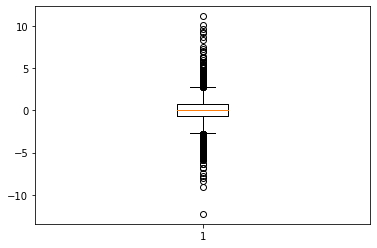

In [45]:
plt.boxplot(df['variation']) # RSI Distribuation

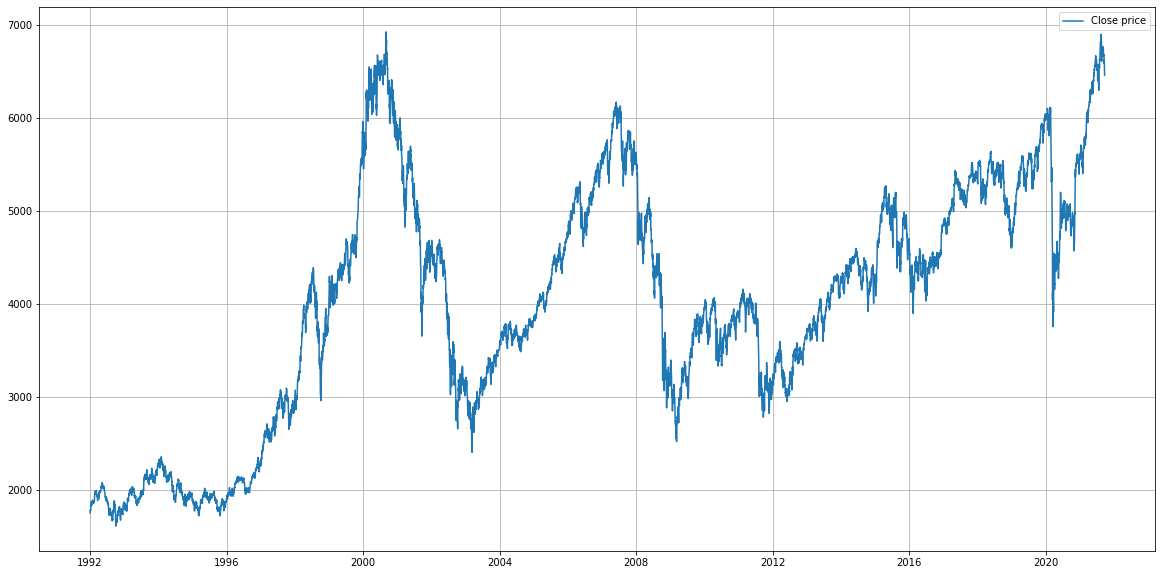

In [46]:
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df[['Close']])
plt.legend(['Close price'])
plt.grid(True)
plt.show()

In [47]:
df_month_var = df.groupby('Month').variation.agg(['sum','max','min','std'])
df_month_var = df_month_var.reset_index()

In [48]:
df_month_var

,Month,sum,max,min,std
0,1,16.81,6.01,-6.83,1.260398
1,2,24.79,3.41,-4.25,1.192375
2,3,26.67,8.39,-12.28,1.551158
3,4,78.78,5.37,-4.30,1.258671
4,5,-20.19,9.66,-4.60,1.257482
5,6,-19.98,4.75,-8.04,1.259602
6,7,23.11,7.04,-5.40,1.306621
7,8,-27.69,5.44,-5.48,1.359664
8,9,-50.58,9.27,-7.39,1.555870
9,10,49.84,11.18,-9.04,1.732321


In [53]:
def month(a):
  if a == 1:
    return 'January'
  if a == 2:
    return 'February'
  if a == 3:
    return 'Mars'
  if a == 4:
    return 'April'
  if a == 5:
    return 'May'
  if a == 6:
    return 'June'
  if a == 7:
    return 'July'
  if a == 8:
    return 'August'
  if a == 9:
    return 'September'
  if a == 10:
    return 'October'
  if a == 11:
    return 'November'
  if a == 12:
    return 'December'
  
df_month_var['month'] = df_month_var['Month'].apply(month)


In [58]:
df_month_var.drop(['Month'], inplace=True, axis=1)

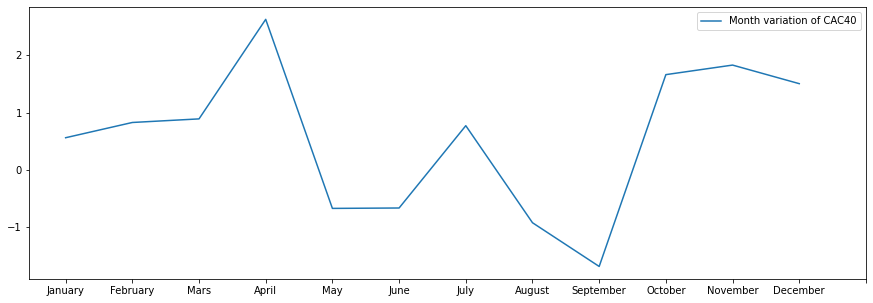

In [70]:
plt.figure(figsize=(15,5))
plt.plot(df_month_var['month'], df_month_var['sum']/30)
plt.xticks(list(range(13)))
plt.legend(['Month variation of CAC40'])
# 30 years between 1992 and 2021

In [73]:
(df_month_var['sum']/30).sum()

6.7170000000000005

- Le marché CAC40 est plus acheteur en Q1 et Q4
- Le marché CAC40 est plus vendeur en Q3
- Le marché CAC40 est plus neutre en Q2


In [60]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,variation,month
0,1992-01-02,1755.300049,1765.500000,1746.599976,1749.900024,1749.900024,0.0,1,0.00,January
1,1992-01-03,1760.500000,1771.000000,1749.099976,1770.300049,1770.300049,0.0,1,1.17,January
2,1992-01-06,1794.000000,1802.500000,1782.699951,1787.599976,1787.599976,0.0,1,0.98,January
3,1992-01-07,1784.000000,1784.099976,1771.800049,1778.699951,1778.699951,0.0,1,-0.50,January
4,1992-01-08,1763.500000,1787.300049,1758.099976,1785.599976,1785.599976,0.0,1,0.39,January


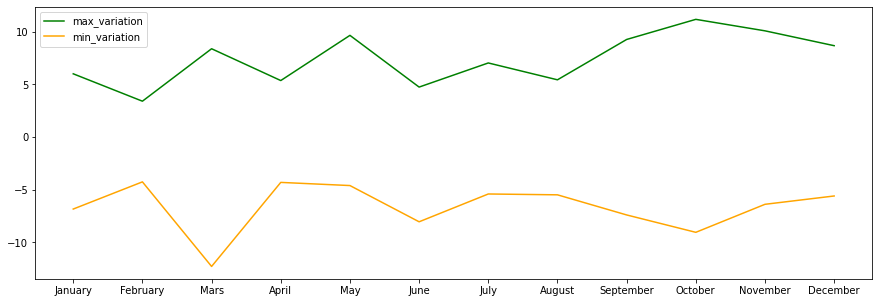

In [62]:
plt.figure(figsize=(15,5))
plt.plot(df_month_var['month'],df_month_var['max'], c='green')
plt.plot(df_month_var['month'],df_month_var['min'], c='orange')
plt.legend(['max_variation', 'min_variation'])

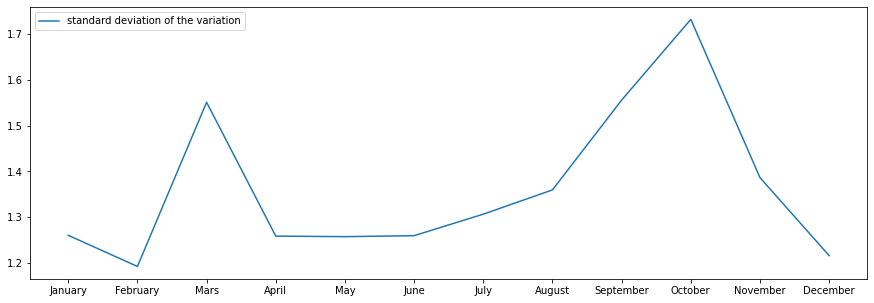

In [63]:
plt.figure(figsize=(15,5))
plt.plot(df_month_var['month'],df_month_var['std'])
plt.legend(['standard deviation of the variation'])

Le marché CAC40 est plus stable en Decembre, janvier et Q2. Mais plus turbulent en Mars, septembre et octobre 

In [119]:
df_stat['median_variation'] = df.groupby('Month').variation.agg(['median'])

Text(0, 0.5, 'median_variation')

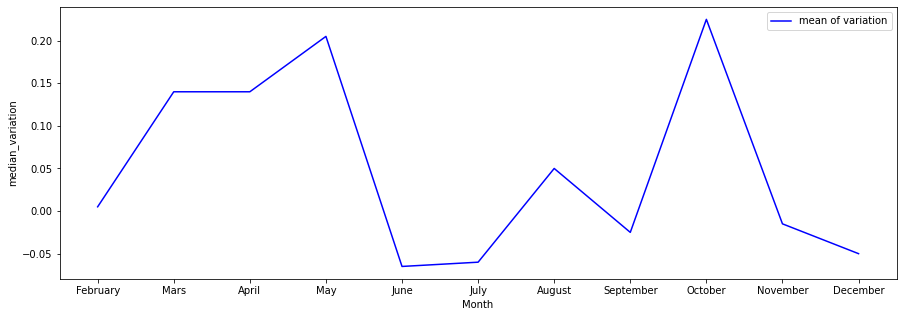

In [121]:
plt.figure(figsize=(15,5))
plt.plot(df_stat['month'],df_stat['median_variation'], c='blue')
plt.legend(['mean of variation'])
plt.xlabel('Month')
plt.ylabel('median_variation')

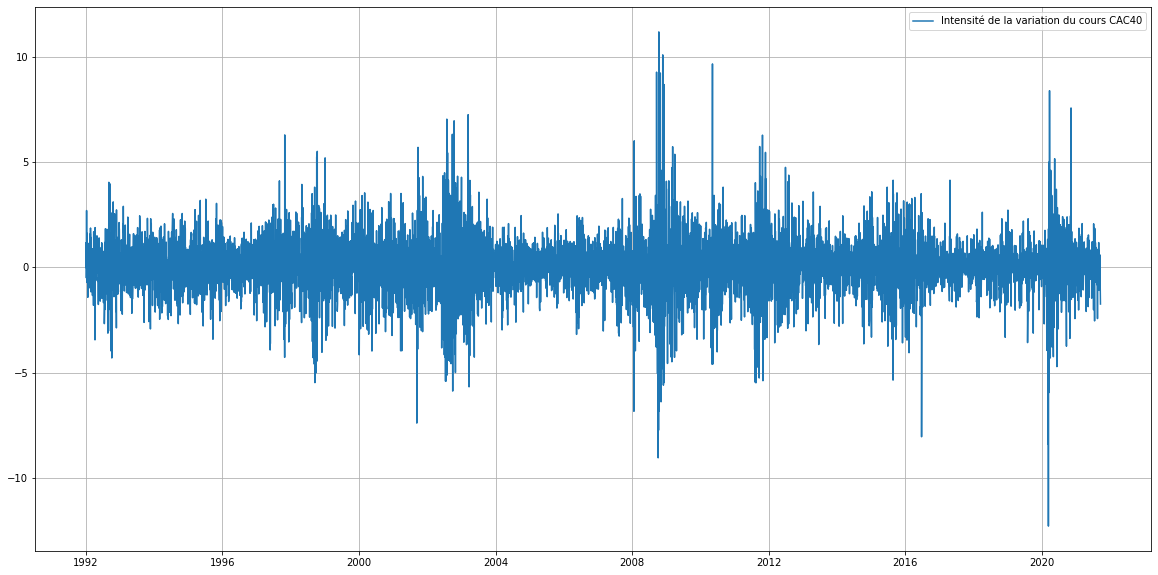

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df[['variation']])
plt.legend(['Intensité de la variation du cours CAC40'])
plt.grid(True)
plt.show()

La variation journaliére est plus intense pendant les crises 2008 et 2020



In [ ]:
# preapre labels and features

**Partie Mchine learning à reconstruire**

In [ ]:
x_feature =[]
y_var = []
from statistics import mean
for i in range(len(data_day)-14):
    a = list(data_day['feature_1'].iloc[0+i:10+i].values)
    x_feature.append(a)
    
    y = data_day['var'].iloc[10+i:15+i].sum()
    y_var.append(y)


In [ ]:
data_day['var']

In [ ]:
data_day['var'].iloc[-5:].sum()

In [ ]:
data_day['var'].iloc[-5:-4] / data_day['var'].iloc[-1:]

In [ ]:
labels

In [ ]:
data_day['var'].iloc[10:15].sum()

In [ ]:
y_var[-1]

In [ ]:
y_var[0]

In [ ]:
np.array(x_feature).shape

In [ ]:
len(y_var)

In [ ]:
y_var[-1]

In [ ]:
len(y_var)

In [ ]:
len(x_feature)

In [ ]:
len(x_feature)

In [ ]:
len(x_feature)

In [ ]:
labels = []
for elem in y_var:
  if (elem > -1 ) & (elem < 1):
      labels.append('neutre')
  if (elem >= 1):
      labels.append('haussier')
  if (elem <= -1) :
      labels.append('baissier')
  
 

In [ ]:
min(y_var)

In [ ]:
max(y_var)

In [ ]:
len(labels)

In [ ]:
len(y_var)

In [ ]:
len(x_feature)

In [ ]:
labels = np.array(labels)
labels

In [ ]:
labels[-10:]

In [ ]:
x_feature = np.array(x_feature)
len(x_feature)

In [ ]:
len(labels)

In [ ]:
len(y_var)

In [ ]:
# convertir en array
X = x_feature
Y = labels

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.1, random_state= 44)

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 30))
print(k_range)
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
print(param_grid)

In [ ]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [ ]:
# fit the grid µwith data
grid.fit(X_train, y_train)

In [ ]:
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

In [ ]:
grid.best_score_

In [ ]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=34, p=2,
                     weights='uniform')
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
x = x_feature[-1:]
x

In [ ]:
clf.predict(x)[0]

In [ ]:
data_day.tail()

In [ ]:
from sklearn import tree
model_tree  = tree.DecisionTreeClassifier()

param_dict={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [ ]:
# fit data with the best parameters
import matplotlib.pyplot as plt
grid1 =GridSearchCV(model_tree,
                 param_grid=param_dict,
                 cv=10,
                 verbose=1,
                 n_jobs=-1)

grid1.fit(X_train, y_train)

In [ ]:
grid1.best_params_

In [ ]:
grid1.best_estimator_

In [ ]:
grid1.best_score_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model_tree.fit(X_train,y_train)

In [ ]:
x = x_feature[-1:]
x

In [ ]:
model_tree.predict(x)

In [ ]:
data_day.tail()

In [ ]:
# Visualisation de l'arbre
plt.figure(figsize =(10,10))
tree.plot_tree(model_tree)
plt.show()

In [ ]:
# confusion matrix & test data train
from sklearn.metrics import confusion_matrix

y_pred = model_tree.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
# confusion matrix & test data test
from sklearn.metrics import confusion_matrix

y_pred = model_tree.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
# score accuracy on the test data
from sklearn.metrics import accuracy_score
y_pred = model_tree.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
x_feature

In [ ]:
np.array(x_feature[-11:-1])

In [ ]:
test = np.array(x_feature[-50:-40])

In [ ]:
x_feature[-50:-40]

In [ ]:
data_day.tail(20)

In [ ]:
model_tree.predict(test)

In [ ]:
pd.DataFrame(list(labels)).value_counts()

In [ ]:
clf.predict(test)

In [ ]:
labels

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":[1,2,3], "penalty":["l1","l2"]}# 
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
x = data.tail(10)['MACD'].values

In [ ]:
x_macd = np.array(x_macd)

In [ ]:
X_train.shape

In [ ]:
np.array(x_macd).reshape(1,10)

In [ ]:
x_macd =[]
for i in range(len(data)-9):
    x = list(macd['MACD'].iloc[0+i:10+i].values)
    x_macd.append(x)

In [ ]:
len(x_macd)

In [ ]:
x_macd = x_macd[len(x_macd) - 20 : len(x_macd)-10]

In [ ]:
np.array([x] for x in macd.loc[6225:6244].values)

In [ ]:
x[1]

In [ ]:
x_macd[-1]

In [ ]:
len(Y)

In [ ]:
len(x_macd)

In [ ]:
data.tail(20)

In [ ]:
a = np.zeros(shape=(10,10))

In [ ]:
a

In [ ]:
for i in range(len(x_macd)):
       val = x_macd[i]
       a[i] = val

In [ ]:
len(x_macd)

In [ ]:
a[-1]

In [ ]:
b = np.array([x_macd[6]] + [x_macd[7]] +[x_macd[8]] +[x_macd[9]] )

In [ ]:
a

In [ ]:
x = scaler.fit_transform(a)

In [ ]:
model_tree.predict(x)

In [ ]:
pd.Series(Y).value_counts()

In [ ]:
Y

In [ ]:
Y.shape

In [ ]:
y_train.shape